In [338]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from yahoofinancials import YahooFinancials
from yahooquery import Ticker
from yahooquery import screener

In [339]:
print('Ratios presented')
print('Leverage')
print(' :Debt to Assets')
print(' :Debt to Equity')
print(' :Asset to Equity')
print('Profitability')
print(' :Gross Profit Margin')
print(' :Return on Equity')
print(' :Return on Assets')
print(' :Operating Profit Margin')
print('Coverage')
print(' :Interest Coverage')
print(' :Cash Coverage')
print('Liquidity')
print(' :Current Ratio')
print(' :Cash Ratio')
print(' :Working Capital')

Ratios presented
Leverage
 :Debt to Assets
 :Debt to Equity
 :Asset to Equity
Profitability
 :Gross Profit Margin
 :Return on Equity
 :Return on Assets
 :Operating Profit Margin
Coverage
 :Interest Coverage
 :Cash Coverage
Liquidity
 :Current Ratio
 :Cash Ratio
 :Working Capital


In [340]:
#Ticker to analyze
t1 = 'tsla'
ticker = Ticker(t1)
#get balance sheet for ticker
ticker_Bal = ticker.balance_sheet()
#Get cash flow for ticker
ticker_cash = ticker.cash_flow()
#Get income statement for ticker
ticker_income = ticker.income_statement()
#Print the col(series) for the balance sheet
#for col in ticker_Bal.columns:
     #print(col)

In [341]:
#Print the col(series) for the cash flow
#for col in ticker_cash.columns:
     #print(col)

In [342]:
#Print the col(series) for the income statement
#for col in ticker_income.columns:
     #print(col)

In [343]:
#Create a DF of the financial statements
df = [ticker_Bal,ticker_cash,ticker_income]
#Concatenate the DF together easier for pulling series for the Ratios
df_joined = pd.concat(df)

In [344]:
#Print the series of the joined DF
#for col in df_joined.columns:
     #print(col)

In [345]:
print('Leverage Ratios')
#It can be interpreted as the proportion of a company’s assets that are financed by debt as a percentage.
df_joined['Debt/Assets'] = (df_joined['TotalDebt'] / df_joined['TotalAssets'])*100
# indicates how much debt is used to carry a firm's assets.
df_joined['Debt/Equity'] = (df_joined['TotalDebt'] / df_joined['StockholdersEquity']) #It shows the ratio between the total assets of the company to the amount on which equity holders have a claim.
df_joined['Asset/Equity'] = (df_joined['TotalAssets'] / df_joined['StockholdersEquity'])
print(df_joined[['asOfDate','Debt/Assets','Debt/Equity','Asset/Equity']].head(4))

Leverage Ratios
         asOfDate  Debt/Assets  Debt/Equity  Asset/Equity
symbol                                                   
tsla   2017-12-31    42.281594     2.859395      6.762741
tsla   2018-12-31    46.494453     2.808570      6.040655
tsla   2019-12-31    42.172608     2.186310      5.184195
tsla   2020-12-31    25.464064     0.597480      2.346367


In [346]:
print('Profitability')
#for the Series StockholdersEquity take the mean 
avg_share_equity = df_joined['StockholdersEquity'].mean()
#Gross profit margin is a metric analysts use to assess a company's financial health by calculating the amount of money left over from product sales after subtracting the cost of goods sold (COGS) as a percentage
df_joined['Gross_Margin'] = ((df_joined['TotalRevenue'] - df_joined['CostOfRevenue']) / df_joined['TotalRevenue'])*100
#Return on equity (ROE) measures how the profitability of a corporation in relation to stockholders’ equity
df_joined['ROE'] = (df_joined['NetIncome'] / avg_share_equity)*100
#measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.
df_joined['Operating_Margin'] = (df_joined['EBIT'] / df_joined['TotalRevenue'])*100
#Print the results
print(df_joined[['asOfDate','Gross_Margin','ROE','Operating_Margin']].tail(6))

Profitability
         asOfDate  Gross_Margin        ROE  Operating_Margin
symbol                                                      
tsla   2020-12-31           NaN   7.262492               NaN
tsla   2017-12-31     18.900706 -20.644422        -14.778551
tsla   2018-12-31     18.834027 -10.273700         -1.592049
tsla   2019-12-31     16.555456  -9.072852          0.081374
tsla   2020-12-31     21.023592   7.262492          6.031202
tsla   2020-12-31     21.023592   7.262492          6.031202


In [347]:
print('Coverage Ratios')
df_joined['Interest_coverage'] = (df_joined['EBIT'] / df_joined['InterestExpense'])
print(df_joined[['asOfDate','Interest_coverage']].tail(6))

Coverage Ratios
         asOfDate  Interest_coverage
symbol                              
tsla   2020-12-31                NaN
tsla   2017-12-31          -3.687512
tsla   2018-12-31          -0.515290
tsla   2019-12-31           0.029197
tsla   2020-12-31           2.542781
tsla   2020-12-31           2.542781


In [348]:
print('Liquidity Ratios')
df_joined['Current_ratio'] = df_joined['CurrentAssets'] / df_joined['CurrentLiabilities']
df_joined['Cash_ratio'] = df_joined['CashAndCashEquivalents'] / df_joined['CurrentLiabilities'] * 100
print(df_joined[['asOfDate','Current_ratio','Cash_ratio']].head(4))

Liquidity Ratios
         asOfDate  Current_ratio  Cash_ratio
symbol                                      
tsla   2017-12-31       0.856131   43.883502
tsla   2018-12-31       0.831285   36.885187
tsla   2019-12-31       1.134621   58.760664
tsla   2020-12-31       1.875140  136.047165


In [349]:
#ROA breakdown
ROA = (ticker_income['NetIncome'] / ticker_Bal['TotalAssets']) *100
#previous 6 quarters
print(ROA.tail(6))

#print(ticker_income['asOfDate'])

symbol
tsla    2.011134
tsla    1.323157
tsla    2.407925
tsla    2.320138
tsla    2.011134
tsla    1.323157
dtype: float64


In [350]:
#Cash_Coverage
ticker_income['Cash_coverage'] = (ticker_income['EBIT'] + ticker_income['ReconciledDepreciation'])/ ticker_income['InterestExpense']
print(ticker_income[['asOfDate','Cash_coverage']])

         asOfDate  Cash_coverage
symbol                          
tsla   2017-12-31      -0.215953
tsla   2018-12-31       2.351748
tsla   2019-12-31       3.173723
tsla   2020-12-31       5.647059
tsla   2020-12-31       5.647059


In [351]:
ticker_Bal['Asset_coverage'] = (ticker_Bal['TotalAssets'] - ticker_Bal['CurrentLiabilities'] )/ ticker_Bal['TotalDebt']
print(ticker_Bal[['asOfDate','Asset_coverage']])

         asOfDate  Asset_coverage
symbol                           
tsla   2017-12-31        1.731660
tsla   2018-12-31        1.428154
tsla   2019-12-31        1.633976
tsla   2020-12-31        2.854131


In [352]:
ticker_income['ROE'] = (ticker_income['NetIncome']/ avg_share_equity) *100
print(ticker_income[['asOfDate' , 'ROE']])

         asOfDate        ROE
symbol                      
tsla   2017-12-31 -20.644422
tsla   2018-12-31 -10.273700
tsla   2019-12-31  -9.072852
tsla   2020-12-31   7.262492
tsla   2020-12-31   7.262492


Text(0, 0.5, 'Debt to Assets')

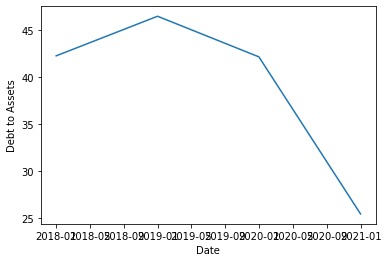

In [353]:
plt.plot(df_joined['asOfDate'],df_joined['Debt/Assets'])
plt.xlabel('Date')
plt.ylabel('Debt to Assets')

Text(0, 0.5, 'Debt to Equity')

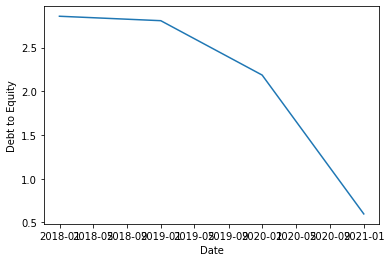

In [354]:
plt.plot(df_joined['asOfDate'],df_joined['Debt/Equity'])
plt.xlabel('Date')
plt.ylabel('Debt to Equity')

Text(0, 0.5, 'Asset to Equity')

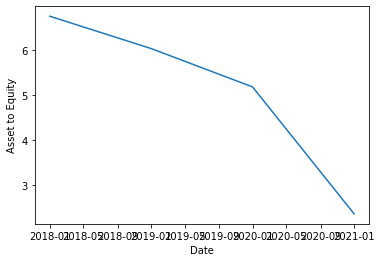

In [355]:
plt.plot(df_joined['asOfDate'],df_joined['Asset/Equity'])
plt.xlabel('Date')
plt.ylabel('Asset to Equity')

Text(0, 0.5, 'Gross Margin')

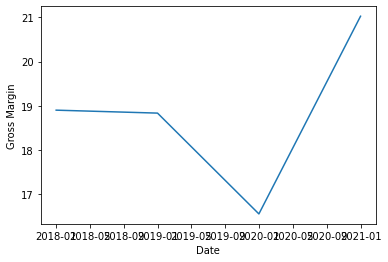

In [356]:
plt.plot(df_joined['asOfDate'],df_joined['Gross_Margin'])
plt.xlabel('Date')
plt.ylabel('Gross Margin')

Text(0, 0.5, 'Return on Equity')

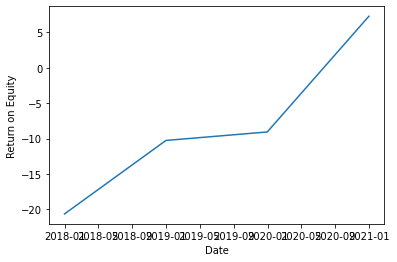

In [357]:
plt.plot(ticker_income['asOfDate'],ticker_income['ROE'])
plt.xlabel('Date')
plt.ylabel('Return on Equity')
#line is avg shareholder equity

Text(0, 0.5, 'Operating profit margin')

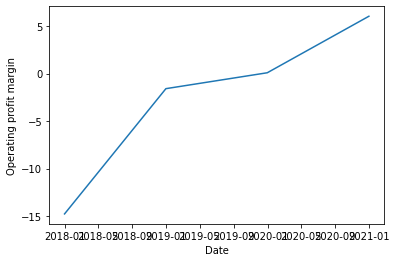

In [358]:
plt.plot(df_joined['asOfDate'], df_joined['Operating_Margin'])
plt.xlabel('Date')
plt.ylabel('Operating profit margin')

Text(0, 0.5, 'Interest Coverage')

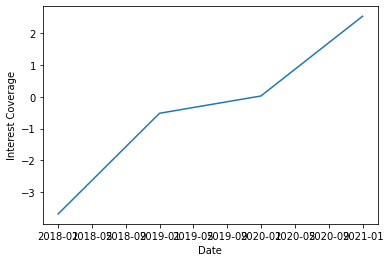

In [359]:
plt.plot(df_joined['asOfDate'],df_joined['Interest_coverage'])
plt.xlabel('Date')
plt.ylabel('Interest Coverage')

Text(0, 0.5, 'Cash Coverage')

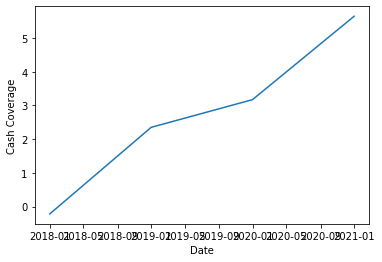

In [360]:
plt.plot(ticker_income['asOfDate'],ticker_income['Cash_coverage'])
plt.xlabel('Date')
plt.ylabel('Cash Coverage')

Text(0, 0.5, 'Asset Coverage')

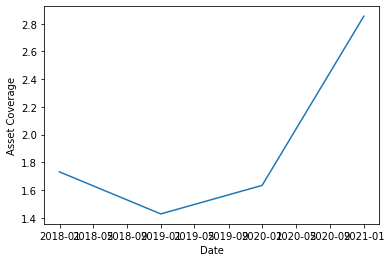

In [361]:
plt.plot(ticker_Bal['asOfDate'],ticker_Bal['Asset_coverage'])
plt.xlabel('Date')
plt.ylabel('Asset Coverage')

Text(0, 0.5, 'Current Ratio')

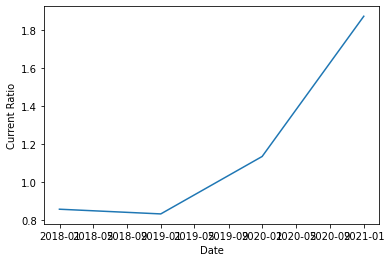

In [362]:
plt.plot(df_joined['asOfDate'],df_joined['Current_ratio'])
plt.xlabel('Date')
plt.ylabel('Current Ratio')

Text(0, 0.5, 'Cash_Ratio')

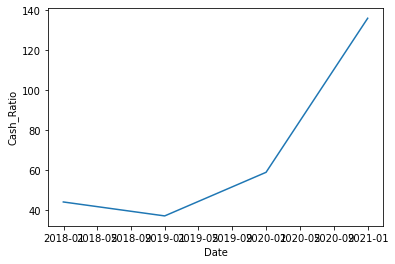

In [363]:
plt.plot(df_joined['asOfDate'],df_joined['Cash_ratio'])
plt.xlabel('Date')
plt.ylabel('Cash_Ratio')

In [364]:
#Create ticker 2 so that way can compare
t2 = 'aapl'
ticker2 = Ticker(t2)
#get balance sheet for ticker
ticker_Bal2 = ticker2.balance_sheet()
#Get cash flow for ticker
ticker_cash2 = ticker2.cash_flow()
#Get income statement for ticker
ticker_income2 = ticker2.income_statement()

In [365]:
df2 = [ticker_Bal2,ticker_cash2,ticker_income2]
#Concatenate the DF together easier for pulling series for the Ratios
df_joined2 = pd.concat(df2)

In [366]:
print('Leverage Ratios')
#It can be interpreted as the proportion of a company’s assets that are financed by debt as a percentage.
df_joined2['Debt/Assets'] = (df_joined2['TotalDebt'] / df_joined2['TotalAssets'])*100
# indicates how much debt is used to carry a firm's assets.
df_joined2['Debt/Equity'] = (df_joined2['TotalDebt'] / df_joined2['StockholdersEquity']) #It shows the ratio between the total assets of the company to the amount on which equity holders have a claim.
df_joined2['Asset/Equity'] = (df_joined2['TotalAssets'] / df_joined2['StockholdersEquity'])
print(df_joined2[['asOfDate','Debt/Assets','Debt/Equity','Asset/Equity']].head(4))

print('Profitability')
#for the Series StockholdersEquity take the mean 
avg_share_equity2 = df_joined2['StockholdersEquity'].mean()
#Gross profit margin is a metric analysts use to assess a company's financial health by calculating the amount of money left over from product sales after subtracting the cost of goods sold (COGS) as a percentage
df_joined2['Gross_Margin'] = ((df_joined2['TotalRevenue'] - df_joined2['CostOfRevenue']) / df_joined2['TotalRevenue'])*100
#Return on equity (ROE) measures how the profitability of a corporation in relation to stockholders’ equity
ticker_income2['ROE'] = (ticker_income2['NetIncome']/ avg_share_equity2) *100
#print(ticker_income2[['asOfDate' , 'ROE']])
#measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.
df_joined2['Operating_Margin'] = (df_joined2['EBIT'] / df_joined2['TotalRevenue'])*100
#Print the results
print(ticker_income2[['asOfDate' , 'ROE']])
print(df_joined2[['asOfDate','Gross_Margin','Operating_Margin']].tail(6))

print('Coverage Ratios')
df_joined2['Interest_coverage'] = (df_joined2['EBIT'] / df_joined2['InterestExpense'])
print(df_joined2[['asOfDate','Interest_coverage']].tail(6))
ticker_income2['Cash_coverage'] = (ticker_income2['EBIT'] + ticker_income2['ReconciledDepreciation'])/ ticker_income2['InterestExpense']
print(ticker_income2[['asOfDate','Cash_coverage']])
ticker_Bal2['Asset_coverage'] = (ticker_Bal2['TotalAssets'] - ticker_Bal2['CurrentLiabilities'] )/ ticker_Bal2['TotalDebt']
print(ticker_Bal2[['asOfDate','Asset_coverage']])

print('Liquidity Ratios')
df_joined2['Current_ratio'] = df_joined2['CurrentAssets'] / df_joined2['CurrentLiabilities']
df_joined2['Cash_ratio'] = df_joined2['CashAndCashEquivalents'] / df_joined2['CurrentLiabilities'] * 100
print(df_joined2[['asOfDate','Current_ratio','Cash_ratio']].head(4))

ROA2 = ticker_income2['NetIncome'] / ticker_Bal2['TotalAssets']
#previous 6 quarters
print(ROA2.tail(6))


Leverage Ratios
         asOfDate  Debt/Assets  Debt/Equity  Asset/Equity
symbol                                                   
aapl   2017-09-30    30.821781     0.862981      2.799906
aapl   2018-09-30    31.303028     1.068467      3.413301
aapl   2019-09-30    31.917841     1.194048      3.741004
aapl   2020-09-30    34.714469     1.720810      4.957039
Profitability
         asOfDate        ROE
symbol                      
aapl   2017-09-30  48.713796
aapl   2018-09-30  59.977684
aapl   2019-09-30  55.670607
aapl   2020-06-30  58.862378
aapl   2020-09-30  57.841777
aapl   2020-12-31  64.409691
         asOfDate  Gross_Margin  Operating_Margin
symbol                                           
aapl   2017-09-30     38.469860         28.971270
aapl   2018-09-30     38.343719         28.668838
aapl   2019-09-30     37.817768         26.641017
aapl   2020-06-30     38.187813         26.059586
aapl   2020-09-30     38.233248         25.486403
aapl   2020-12-31     38.780492         

In [367]:
#Create ticker 2 so that way can compare
t3 = 'gm'
ticker3 = Ticker(t3)
#get balance sheet for ticker
ticker_Bal3 = ticker3.balance_sheet()
#Get cash flow for ticker
ticker_cash3 = ticker3.cash_flow()
#Get income statement for ticker
ticker_income3 = ticker3.income_statement()

In [368]:
df3 = [ticker_Bal3,ticker_cash3,ticker_income3]
#Concatenate the DF together easier for pulling series for the Ratios
df_joined3 = pd.concat(df3)

In [369]:
print('Leverage Ratios')
#It can be interpreted as the proportion of a company’s assets that are financed by debt as a percentage.
df_joined3['Debt/Assets'] = (df_joined3['TotalDebt'] / df_joined3['TotalAssets'])*100
# indicates how much debt is used to carry a firm's assets.
df_joined3['Debt/Equity'] = (df_joined3['TotalDebt'] / df_joined3['StockholdersEquity']) #It shows the ratio between the total assets of the company to the amount on which equity holders have a claim.
df_joined3['Asset/Equity'] = (df_joined3['TotalAssets'] / df_joined3['StockholdersEquity'])
print(df_joined3[['asOfDate','Debt/Assets','Debt/Equity','Asset/Equity']].head(4))

print('Profitability')
#for the Series StockholdersEquity take the mean 
avg_share_equity3 = df_joined3['StockholdersEquity'].mean()
#Gross profit margin is a metric analysts use to assess a company's financial health by calculating the amount of money left over from product sales after subtracting the cost of goods sold (COGS) as a percentage
df_joined3['Gross_Margin'] = ((df_joined3['TotalRevenue'] - df_joined3['CostOfRevenue']) / df_joined3['TotalRevenue'])*100
#Return on equity (ROE) measures how the profitability of a corporation in relation to stockholders’ equity
ticker_income3['ROE'] = (ticker_income3['NetIncome']/ avg_share_equity3) *100
print(ticker_income3[['asOfDate' , 'ROE']])
#measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.
df_joined3['Operating_Margin'] = (df_joined3['EBIT'] / df_joined3['TotalRevenue'])*100
#Print the results
print(df_joined3[['asOfDate','Gross_Margin','Operating_Margin']].tail(6))

print('Coverage Ratios')
df_joined3['Interest_coverage'] = (df_joined3['EBIT'] / df_joined3['InterestExpense'])
print(df_joined3[['asOfDate','Interest_coverage']].tail(6))
ticker_income3['Cash_coverage'] = (ticker_income3['EBIT'] + ticker_income3['ReconciledDepreciation'])/ ticker_income3['InterestExpense']
print(ticker_income3[['asOfDate','Cash_coverage']])
ticker_Bal3['Asset_coverage'] = (ticker_Bal3['TotalAssets'] - ticker_Bal3['CurrentLiabilities'] )/ ticker_Bal3['TotalDebt']
print(ticker_Bal3[['asOfDate','Asset_coverage']])

print('Liquidity Ratios')
df_joined3['Current_ratio'] = df_joined3['CurrentAssets'] / df_joined3['CurrentLiabilities']
df_joined3['Cash_ratio'] = df_joined3['CashAndCashEquivalents'] / df_joined3['CurrentLiabilities'] * 100
print(df_joined3[['asOfDate','Current_ratio','Cash_ratio']].head(4))

ROA3 = ticker_income3['NetIncome'] / ticker_Bal3['TotalAssets']
#previous 6 quarters
print(ROA3.tail(6))


Leverage Ratios
         asOfDate  Debt/Assets  Debt/Equity  Asset/Equity
symbol                                                   
gm     2017-12-31    44.342109     2.691895      6.070741
gm     2018-12-31    46.164978     2.700746      5.850206
gm     2019-12-31    45.753101     2.496507      5.456475
gm     2020-12-31    47.136832     2.461981      5.223051
Profitability
         asOfDate        ROE
symbol                      
gm     2017-12-31  -9.618939
gm     2018-12-31  19.949839
gm     2019-12-31  16.758462
gm     2020-12-31  15.999203
gm     2020-12-31  15.999203
         asOfDate  Gross_Margin  Operating_Margin
symbol                                           
gm     2020-12-31           NaN               NaN
gm     2017-12-31     13.456466          8.543287
gm     2018-12-31      9.585240          6.259138
gm     2019-12-31     10.180928          5.988181
gm     2020-12-31     11.162183          7.505409
gm     2020-12-31     11.162183          7.505409
Coverage Ratios
   

In [370]:
print('Comparision')
print('The Debt to Assets for the Tickers are:',df_joined['Debt/Assets'].head(4),df_joined2['Debt/Assets'].head(4),df_joined3['Debt/Assets'].head(4))

Comparision
The Debt to Assets for the Tickers are: symbol
tsla    42.281594
tsla    46.494453
tsla    42.172608
tsla    25.464064
Name: Debt/Assets, dtype: float64 symbol
aapl    30.821781
aapl    31.303028
aapl    31.917841
aapl    34.714469
Name: Debt/Assets, dtype: float64 symbol
gm    44.342109
gm    46.164978
gm    45.753101
gm    47.136832
Name: Debt/Assets, dtype: float64


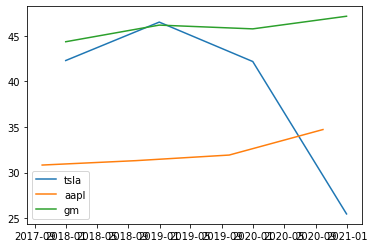

In [372]:
plt.plot(df_joined['asOfDate'],df_joined['Debt/Assets'], label = t1)
plt.plot(df_joined2['asOfDate'],df_joined2['Debt/Assets'], label = t2)
plt.plot(df_joined3['asOfDate'],df_joined3['Debt/Assets'], label = t3)
plt.legend()